<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Coursework</h1>
<h1 align="center">Predicting Flight Delays of U.S. carriers</h1>
<br><br><br>
<h3 align="center">4th March 2022</h3>

## Table of Contents

* [**Section 1**](#section1): **Problem Framing**
* [**Section 2**](#section2): **Get the Data**
    * [2.1](#2_1): Setup
    * [2.2](#2_2): Load the data
    * [2.3](#2_3): Data structure
* [**Section 3**](#section3): **Data Exploration**
    * [3.1](#3_1): Looking for correlations
* [**Section 4**](#section4): **Data Cleaning and Feature Engineering**
    * [4.1](#4_1): Variable Description
* [**Section 5**](#section5): **Data Visulization**
    * [5.1](#5_1): Airline Average Delay
    * [5.2](#5_2): Busiest Airports
    * [5.3](#5_3): Logistic Regression
    * [5.4](#5_4): Airport Average Delay
    * [5.5](#5_5): Airline Average Delay on Destination Airport
    * [5.6](#5_6): Total Month Flights
    * [5.7](#5_7): Average Month Delay
* [**Section 6**](#section6): **Prepare the data to better expose the underlying data patterns to Machine Learning algorithms**
    * [6.1](#6_1): Handling Categorical Variables
    * [6.2](#6_2): Splitting the Dataset
    * [6.3](#6_3): Feature Scaling Test Set
* [**Section 7**](#section7): **Machine Learning Models**
    * [7.1](#7_1): Random Forest Regressor
    * [7.2](#7_2): Decision Tree Regressor
    * [7.3](#7_3): Gradient Boosting
    * [7.4](#7_4): Linear Regression
* [**Section 8**](#section8): **Fine-tuning Models and Combining Them into a Better Solution**
    * [8.1](#8_1): Fine-tuning of Random Forest
    * [8.2](#8_2): Fine-tuning of Linear Regression
* [**Section 9**](#section9): **Final Solution, Limitations and Summary Conclusions**
    * [9.1](#9_1): Final Solution 
    * [9.2](#9_2): Limitations
    * [9.3](#9_3): Summary Conclusions
* [**Section 10**](#section10): **References**

# Section 1: <a class="anchor" id="section1"></a> Problem Framing

The increasing utilization of airplnes as a way of travelling has changed how people live. Whether it is travel for leisure to get away from the busy lifestyles and relax or visiting one's home country to see their families and friends who they may have not seen in a long time. Air travel is the most popular way of travelling between different continents and between far distances. That of course, comes with its downside. Many flights daily become subjects to delays, because of airplane issues, weather conditions, lack of staffing and much more. Airline companies are in a position to identify pertinent issues which need to be fixed as part of their service and provide excellent customer support and flight delays is one of those issues.

In this notebook a model will be created aiming at predicting flight delays based on a number of a features used from a dataset. The purpose is to find out ways, using Machine Learning algorithms and predict future flight delays based on the data available. The analysis will be using cross-validation to identify the most accurate parameters and will build RandomForestRegressor, DecisionTreeRegressor, GradientBoosting, LinearRegression and finally a VotingRegressor which will combine 2 of the original models.

# Section 2: <a class="anchor" id="section2"></a> Get the Data

The dataset used for the below analysis was obtained from: https://www.mavenanalytics.io/data-playground?page=5 and it's a dataset containing 5+ million rows of data for flights delays in the United States in 2015. The total number of columns presented at first is 31 and contains information such as the airport of departure and arrival, the times of flights, their duration, the day and month of flight and airline names.

## Section 2.1: <a class="anchor" id="2_1"></a> Setup

We start by importing all the necessary packages to analyze and work with the datasets.

In [1]:
import time
import random 
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120

Autosaving every 120 seconds


In [2]:
import warnings
warnings.simplefilter('ignore')

## Section 2.2: <a class="anchor" id="2_2"></a> Load the Data

The comments are code to select subset of data since the dataset is to o large, at 5+ million rows of observations.

In [3]:
random.seed(10)
#filename = "flights.csv"
#n = sum(1 for line in open(filename)) - 1 #number of records in file
#s = 50000 #desired sample size
#skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
#flights_df = pd.read_csv(filename, skiprows=skip)
#flights_df.to_csv('flights_short.csv', index = False)

# Importing main dataset
flights_df = pd.read_csv("flights_short.csv")
# Importing supporting datasets
airports_df = pd.read_csv("airports.csv")
airlines_df = pd.read_csv("airlines.csv")


Because the dataset is too large at 5+ million rows, only a subset of the data will be used for the analysis in order to lessen the computational time. A random sample of the rows is taken in the code chunck above to avoid selection bias. Thus, it will be easier to work with the dataset provided with 50,000 rows.

## Section 2.3: <a class="anchor" id="2_3"></a> Quick Look at Data Structure

In [4]:
flights_df.head() #first 5 rows of data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,UA,1167,N66837,ORD,DEN,533,...,723.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,DL,2453,N966DL,GSP,ATL,550,...,649.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,DL,1574,N532US,MCO,MSP,600,...,822.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4213,N17560,MHT,ORD,600,...,749.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,MQ,3350,N830MQ,RDU,JFK,600,...,738.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Taking a first look at the dataset, and we can see that the final 6 columns only have NaN values in the first 5 rows which will be investigated later to see the amount of total null values in those columns.

In [5]:
flights_df["AIRLINE"].value_counts()

WN    10971
DL     7667
AA     6277
OO     5015
EV     4853
UA     4371
MQ     2500
B6     2270
US     1674
AS     1485
NK     1010
F9      736
HA      658
VX      513
Name: AIRLINE, dtype: int64

# Section 3: <a class="anchor" id="section3"></a> Data Exploration

In [6]:
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49277.000000,49277.000000,49241.000000,49241.000000,...,50000.000000,49210.000000,49097.000000,50000.000000,50000.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000
mean,2015.0,6.539540,15.756180,3.929400,2169.521780,1330.630020,1336.994095,9.401201,16.045673,1359.352105,...,1496.011100,1478.402093,4.401287,0.002620,0.015440,13.506247,0.055296,19.379902,23.278979,2.578381
std,0.0,3.417893,8.732691,1.989898,1755.029783,482.476155,495.193903,37.259581,8.826761,496.523567,...,504.406233,524.115041,39.594510,0.051119,0.123296,27.518010,1.408396,50.712820,43.650494,17.249727
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-40.000000,1.000000,1.000000,...,1.000000,1.000000,-59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,728.000000,920.000000,924.000000,-5.000000,11.000000,938.000000,...,1111.000000,1100.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1688.000000,1325.000000,1332.000000,-2.000000,14.000000,1345.000000,...,1523.000000,1516.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3214.250000,1730.000000,1740.000000,7.000000,19.000000,1754.000000,...,1916.000000,1915.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.000000,2400.000000,1551.000000,151.000000,2400.000000,...,2359.000000,2400.000000,1546.000000,1.000000,1.000000,415.000000,79.000000,1546.000000,1020.000000,472.000000


Using the .describe() function we can see that the average delay in departure is 9.4 minutes and 4.4 minutes for arrival. 

<function matplotlib.pyplot.show(close=None, block=None)>

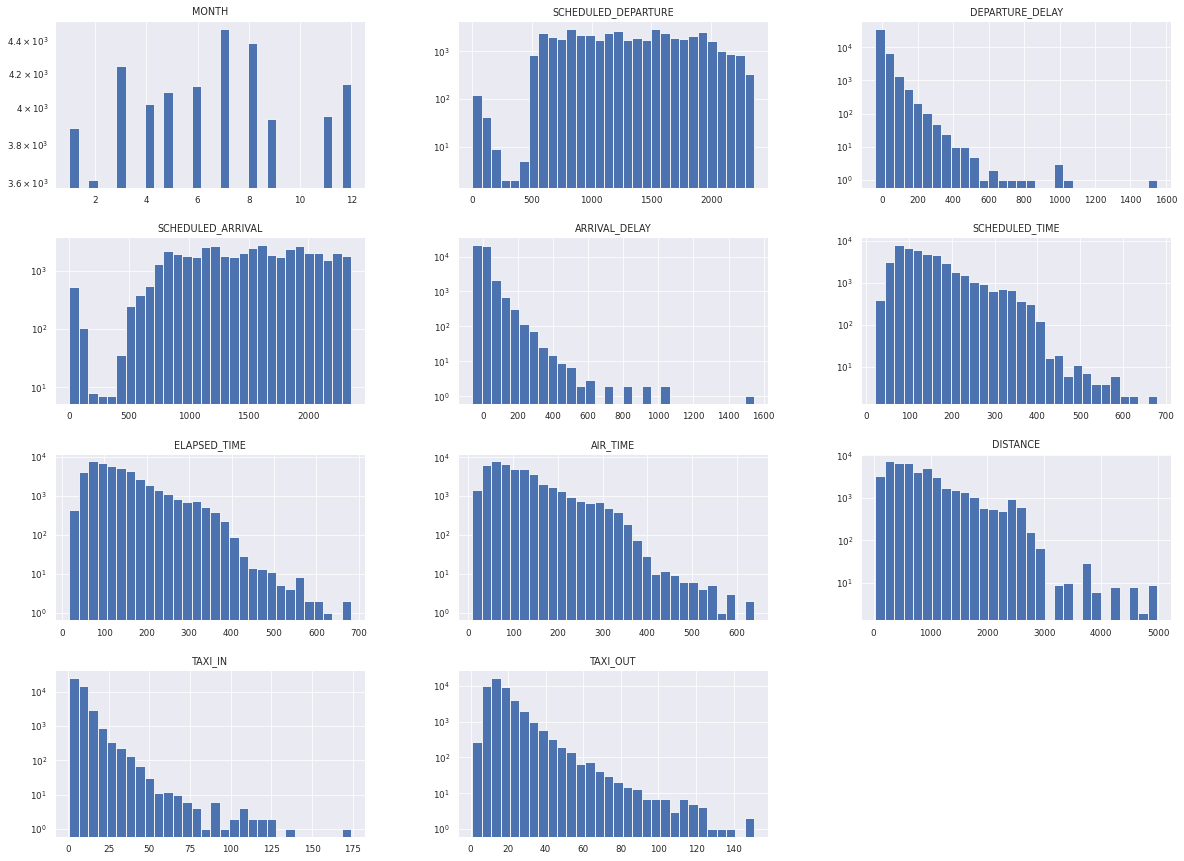

In [86]:
flights_df.hist(bins = 30, figsize = (20, 15), log = True)
plt.show

In [8]:
#Supporting Dataset
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [9]:
#Supporting Dataset
airlines_df

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [10]:
# Getting the info of our main dataset
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49869 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       49277 non-null  float64
 11  DEPARTURE_DELAY      49277 non-null  float64
 12  TAXI_OUT             49241 non-null  float64
 13  WHEELS_OFF           49241 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  int64  
 15  ELAPSED_TIME         49097 non-null 

## Section 3.1: <a class="anchor" id="3_1"></a> Looking for Correlations

In [11]:
corr_matrix = flights_df.corr()

In [12]:
corr_matrix["ARRIVAL_DELAY"].sort_values(ascending = False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.944652
AIRLINE_DELAY          0.643797
LATE_AIRCRAFT_DELAY    0.511330
AIR_SYSTEM_DELAY       0.234293
TAXI_OUT               0.227367
WEATHER_DELAY          0.204111
DEPARTURE_TIME         0.163604
WHEELS_OFF             0.162097
TAXI_IN                0.124179
SCHEDULED_DEPARTURE    0.096064
SCHEDULED_ARRIVAL      0.089055
WHEELS_ON              0.058333
ARRIVAL_TIME           0.050658
ELAPSED_TIME           0.028500
FLIGHT_NUMBER          0.020250
DAY                    0.001745
SECURITY_DELAY        -0.007481
AIR_TIME              -0.008414
DAY_OF_WEEK           -0.018767
DISTANCE              -0.027589
SCHEDULED_TIME        -0.032091
MONTH                 -0.035776
YEAR                        NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

Here we can see that there is a strong correlation between "DEPARTURE_DELAY" and "ARRIVAL_DELAY". This is expected because if flights depart late from the airport of origin, they are more likely to be late on arrival too. 

array([[<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='DEPARTURE_DELAY'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='DEPARTURE_DELAY'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='DEPARTURE_DELAY'>],
       [<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='ARRIVAL_DELAY'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='ARRIVAL_DELAY'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='ARRIVAL_DELAY'>],
       [<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='DISTANCE'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='DISTANCE'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='DISTANCE'>]], dtype=object)

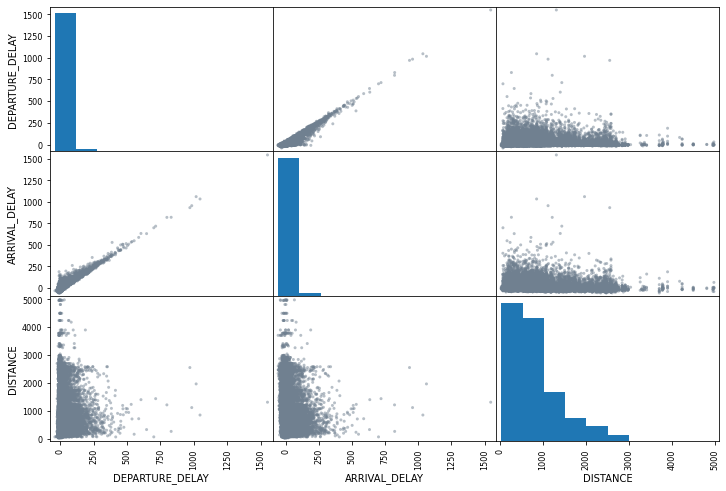

In [13]:
from pandas.plotting import scatter_matrix

columns = ["DEPARTURE_DELAY", "ARRIVAL_DELAY", "DISTANCE"]
scatter_matrix(flights_df[columns], figsize=(12, 8), color = "slategrey")

array([[<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='DEPARTURE_DELAY'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='DEPARTURE_DELAY'>,
        <AxesSubplot:xlabel='ELAPSED_TIME', ylabel='DEPARTURE_DELAY'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='DEPARTURE_DELAY'>],
       [<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='ARRIVAL_DELAY'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='ARRIVAL_DELAY'>,
        <AxesSubplot:xlabel='ELAPSED_TIME', ylabel='ARRIVAL_DELAY'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='ARRIVAL_DELAY'>],
       [<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='ELAPSED_TIME'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='ELAPSED_TIME'>,
        <AxesSubplot:xlabel='ELAPSED_TIME', ylabel='ELAPSED_TIME'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='ELAPSED_TIME'>],
       [<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='DISTANCE'>,
        <AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='DISTANCE'>,
        <AxesSubplot:xlabel='ELAP

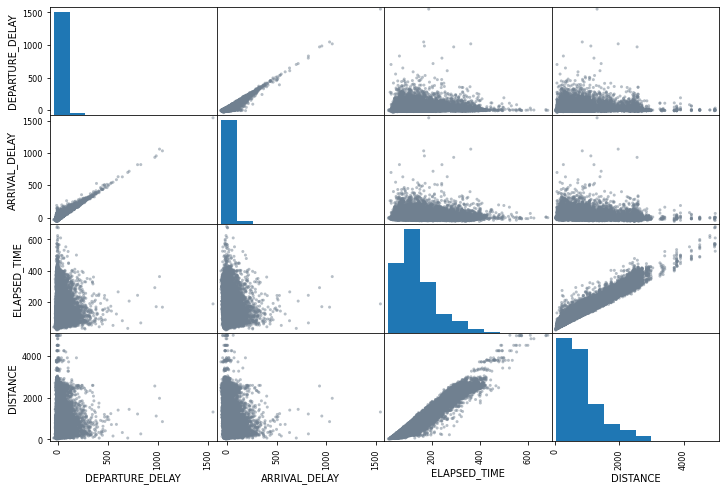

In [14]:
attributes = ["DEPARTURE_DELAY", "ARRIVAL_DELAY", "ELAPSED_TIME", "DISTANCE"]
scatter_matrix(flights_df[attributes], figsize=(12, 8), color = "slategrey")

# Section 4: <a class="anchor" id="section4"></a>Data Cleaning and Feature Engineering

In [15]:
#inspect the missing values of the df
missing_values_count = flights_df.isnull().sum().sort_values(ascending = False).to_frame()
missing_values_count['null_percentage'] = round((flights_df.isnull().sum() * 100 / len(flights_df)),2)
missing_values_count.rename(columns={0:'null_count'}, inplace = True)
missing_values_count

,null_count,null_percentage
CANCELLATION_REASON,49228,98.46
WEATHER_DELAY,40795,81.59
LATE_AIRCRAFT_DELAY,40795,81.59
AIRLINE_DELAY,40795,81.59
SECURITY_DELAY,40795,81.59
AIR_SYSTEM_DELAY,40795,81.59
AIR_TIME,903,1.81
ARRIVAL_DELAY,903,1.81
ELAPSED_TIME,903,1.81
WHEELS_ON,790,1.58


It can be observed that the last 6 columns do indeed have a lot of null values and thus will be dropped. Below, all rows that have more than 50% of missing values will be dropped since they cannot be used for the analysis. 

In [16]:
#drop columns with more than 50 % nan
flights_df = flights_df.dropna(thresh=flights_df.shape[0]*0.5,how='all',axis=1)

In [17]:
# here we check the values of "ORIGIN_AIRPORT" column and see anomalies
flights_df["ORIGIN_AIRPORT"].value_counts()

ATL      3001
ORD      2393
DFW      1970
LAX      1668
DEN      1665
         ... 
11617       1
14025       1
10268       1
11308       1
MQT         1
Name: ORIGIN_AIRPORT, Length: 564, dtype: int64

Here we can see that some of the values on the "ORIGIN_AIRPORT" column have integers instead of a 3-letter word that characterize the airport based on their IATA code. Thus, the rows not containing the 3-letter word are dropped. We also do the same for "DESTINATION_AIRPORT" to make sure there is no missing values there. 

In [18]:
#only keeping rows that have 3 letters since 3 letters is the IATA Code of Airport
flights_df = flights_df[flights_df['ORIGIN_AIRPORT'].str.len() == 3]
flights_df = flights_df[flights_df['DESTINATION_AIRPORT'].str.len() == 3]

In [19]:
# Dropping all rows with NaN values 
flights_df = flights_df.dropna()

In [20]:
flights_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [21]:
print('After dropping all rows with missing values, the total rows we will be working with are ',
      flights_df.shape[0],'.', sep='')

After dropping all rows with missing values, the total rows we will be working with are 44865.


In [22]:
# Dropping Columns which will not be used for analysis
flights_df.drop(['CANCELLED', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'YEAR', 
                 'WHEELS_ON','WHEELS_OFF', 'DAY', 'DAY_OF_WEEK', 'DIVERTED'], axis=1, inplace=True)

Here you can notice that the column "YEAR" is also dropped because as mentioned in the introduction, the dataset is only for flights that took place in 2015 and thus it is not needed for the analysis. 

<AxesSubplot:>

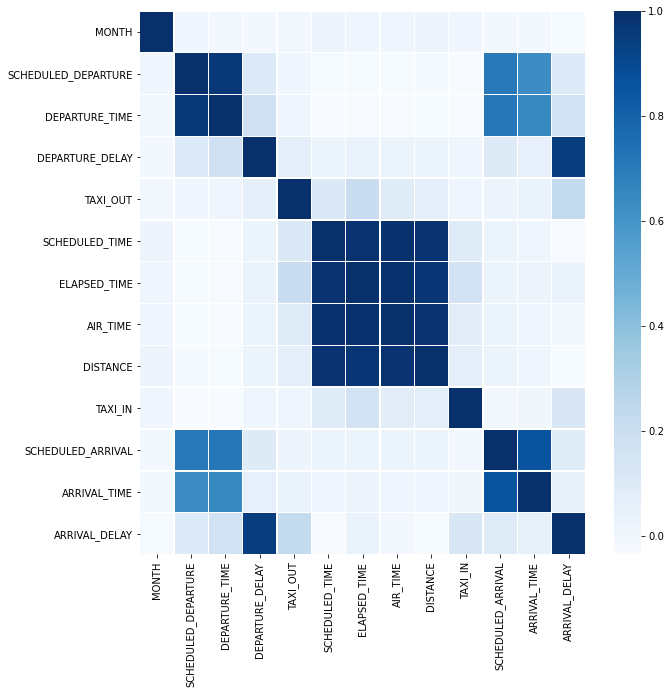

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(flights_df.corr(), linewidths=.5, cmap="Blues")

In [24]:
# Reordering the columns for better visibility 
flights_df = flights_df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'MONTH',
                         'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
                         'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
                         'DISTANCE', 'TAXI_IN', 'TAXI_OUT']]

In [25]:
#Renaming IATA code with Airline Name for easier readability
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('UA', 'United Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('AA', 'American Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('US', 'US Airways')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('F9', 'Frontier Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('B6', 'JetBlue Airways')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('OO', 'Skywest Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('AS', 'Alaska Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('NK', 'Spirit Air Lines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('WN', 'Southwest Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('DL', 'Delta Air Lines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('EV', 'Atlantic Southeast Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('HA', 'Hawaiian Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('MQ', 'American Eagle Airlines')
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.replace('VX', 'Virgin America')

In [26]:
# Converting Floats to Integers since all of them ended with '0'
flights_df['DEPARTURE_TIME'] = flights_df['DEPARTURE_TIME'].astype(str)
flights_df['DEPARTURE_DELAY'] = flights_df['DEPARTURE_DELAY'].astype(int)
flights_df['ARRIVAL_TIME'] = flights_df['ARRIVAL_TIME'].astype(str)
flights_df['ARRIVAL_DELAY'] = flights_df['ARRIVAL_DELAY'].astype(int)
flights_df['ELAPSED_TIME'] = flights_df['ELAPSED_TIME'].astype(int)
flights_df['AIR_TIME'] = flights_df['AIR_TIME'].astype(int)
flights_df['TAXI_IN'] = flights_df['TAXI_IN'].astype(int)
flights_df['TAXI_OUT'] = flights_df['TAXI_OUT'].astype(int)

## Section 4.1: <a class="anchor" id="4_1"></a> Variable Description

In [27]:
variable_description = {'Variable Name': ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'MONTH', 
                                    'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 
                                    'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 
                                    'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE'],
                 'Description': ['Name of the Airline', 'Airport of Origin', 'Airport of Destination', 
             'Month of the Delay', 'Day of the Week of Delay', 'Scheduled Departure Time', 
             'Actual Departure Time', 'Difference between Scheduled and Actual Departure Time', 
             'Scheduled Arrival Time', 'Actual Arrival Time',
             'Difference between Scheduled and Actual Arrival Time', 'Scheduled Time of Flights', 
             'Actual Time of Flight', 'Time of Plane in the Air', 'Distance of Flight']}

In [28]:
variables = pd.DataFrame(variable_description)
variables

,Variable Name,Description
0,AIRLINE,Name of the Airline
1,ORIGIN_AIRPORT,Airport of Origin
2,DESTINATION_AIRPORT,Airport of Destination
3,MONTH,Month of the Delay
4,DAY_OF_WEEK,Day of the Week of Delay
5,SCHEDULED_DEPARTURE,Scheduled Departure Time
6,DEPARTURE_TIME,Actual Departure Time
7,DEPARTURE_DELAY,Difference between Scheduled and Actual Depart...
8,SCHEDULED_ARRIVAL,Scheduled Arrival Time
9,ARRIVAL_TIME,Actual Arrival Time


# Section 5: <a class="anchor" id="section5"></a> Data Visualization

In [29]:
grouped_airlines = flights_df[['AIRLINE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']] #dataframe of 3 columns 
#getting the mean of departure and arrival delay grouped by airline and sorted by departure delay
grouped_airlines = grouped_airlines.groupby(['AIRLINE']).mean().reset_index().sort_values(by = "DEPARTURE_DELAY", ascending = False)
grouped_airlines

,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY
5,Frontier Airlines,15.042105,14.464662
12,United Airlines,14.947651,6.393258
10,Spirit Air Lines,14.932447,13.947951
7,JetBlue Airways,12.519062,7.062072
9,Southwest Airlines,11.471106,5.383058
13,Virgin America,9.438178,5.255965
2,American Eagle Airlines,9.301326,6.326017
1,American Airlines,9.251864,4.017276
8,Skywest Airlines,8.740502,6.900244
3,Atlantic Southeast Airlines,8.486845,6.572992


## Section 5.1: <a class="anchor" id="5_1"></a> Airline Average Delay

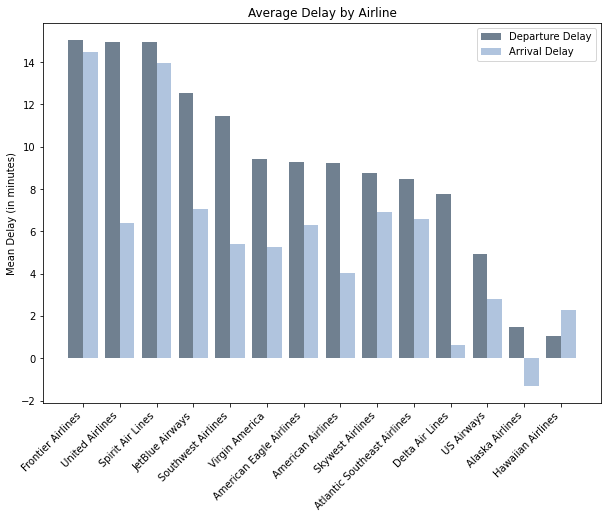

In [30]:
fig = plt.figure(figsize = (10,7)) #dpi for higher resolution graph
X = grouped_airlines['AIRLINE'].tolist()
Y = list(grouped_airlines['DEPARTURE_DELAY'])
Z = list(grouped_airlines['ARRIVAL_DELAY'])


X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Y , 0.4, label = 'Departure Delay', color = 'slategrey')
plt.bar(X_axis + 0.2, Z , 0.4, label = 'Arrival Delay',   color = 'lightsteelblue')
  
plt.xticks(X_axis, X)
plt.xticks(rotation=45, ha="right") #diagonal x ticks
plt.ylabel("Mean Delay (in minutes)")
plt.title("Average Delay by Airline")
plt.legend() #legend in top left side
plt.show()

From the bar chart above we can observe that Frontier Airlines, United Airlines, and Spirit Airlines have, on average, a little over 14 minutes of departure delay. On the other hand, we can see that when it comes to Arrival Delay, Frontier and Spirit flights are around 13 minutes late and United's are only around 6 minutes late. The graph also eludicates that in general, there are more departure delays than arrival delays. This means that in case of a delay in departure, airplanes adapt their speed to decrease the amount of delays in arrival. This can be clearly seen at the values for Alaska Airlines which has ~2 minutes delay in departure but also arrives at the destination ~2 minutes before schedule.

## Section 5.2: <a class="anchor" id="5_2"></a> Busiest Airports

In [31]:
# creating a dataframe to count all flights from airports
airport_flight_count = pd.DataFrame(flights_df["ORIGIN_AIRPORT"].value_counts()).reset_index()
airport_flight_count.head(10)

,index,ORIGIN_AIRPORT
0,ATL,2974
1,ORD,2309
2,DFW,1923
3,DEN,1645
4,LAX,1645
5,PHX,1274
6,IAH,1233
7,SFO,1228
8,LAS,1130
9,MSP,1030


In [32]:
# renaming columns of df to merge it later
airport_flight_count = airport_flight_count.rename(columns={'index': 'ORIGIN_AIRPORT', 'ORIGIN_AIRPORT': 'TOTAL_FLIGHTS'})
most_flights = airport_flight_count.head(10)
most_flights

,ORIGIN_AIRPORT,TOTAL_FLIGHTS
0,ATL,2974
1,ORD,2309
2,DFW,1923
3,DEN,1645
4,LAX,1645
5,PHX,1274
6,IAH,1233
7,SFO,1228
8,LAS,1130
9,MSP,1030


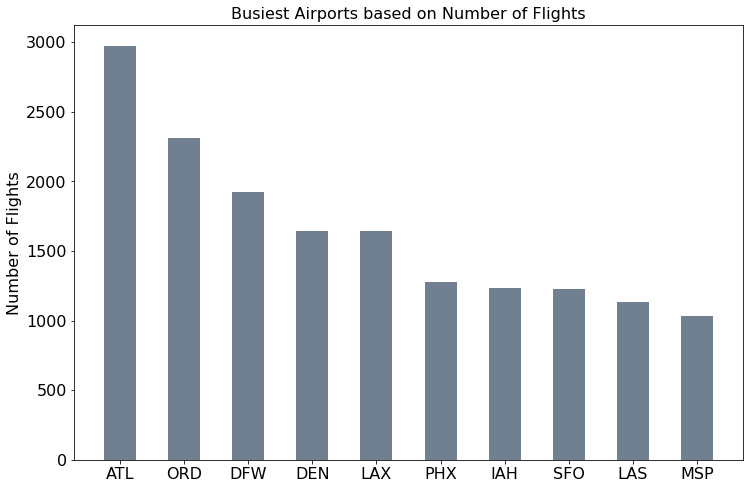

In [33]:
origin_airports = most_flights['ORIGIN_AIRPORT'].tolist()
total_flights = most_flights['TOTAL_FLIGHTS']

plt.figure(figsize=(12,8))
plt.bar(origin_airports, total_flights, color = 'slategrey', width = 0.5)
plt.ylabel("Number of Flights", fontsize=16)
plt.title("Busiest Airports based on Number of Flights", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

In [34]:
# renaming columns of df to merge it later
airports_df = airports_df.rename(columns={'IATA_CODE': 'ORIGIN_AIRPORT'})

In [35]:
# merging 2 dataframes to see which airports have more departures (and flights)
airport_flight_location = pd.merge(airport_flight_count, airports_df, on = "ORIGIN_AIRPORT")

In [36]:
airport_flight_location.head()

,ORIGIN_AIRPORT,TOTAL_FLIGHTS,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ATL,2974,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
1,ORD,2309,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
2,DFW,1923,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
3,DEN,1645,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
4,LAX,1645,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807


## Section 5.3: <a class="anchor" id="5_3"></a> Airport Average Delay

In [37]:
#merging airport_df to flights_df on origin_airport 
airports_delays = pd.merge(airports_df,flights_df[['ORIGIN_AIRPORT', 'MONTH', 'SCHEDULED_DEPARTURE',
                                                   'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 
                                                   'ARRIVAL_TIME', 'ARRIVAL_DELAY']],on='ORIGIN_AIRPORT', 
                         how='left')

In [38]:
grouped_airports = airports_delays[['ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']] #dataframe of 3 columns 
grouped_airports = grouped_airports.groupby(['ORIGIN_AIRPORT']).mean() #getting the mean of departure and arrival delay
                                                                       #grouped by airport of departure

In [39]:
grouped_airports2 = grouped_airports.reset_index().sort_values(by='DEPARTURE_DELAY', ascending=False)

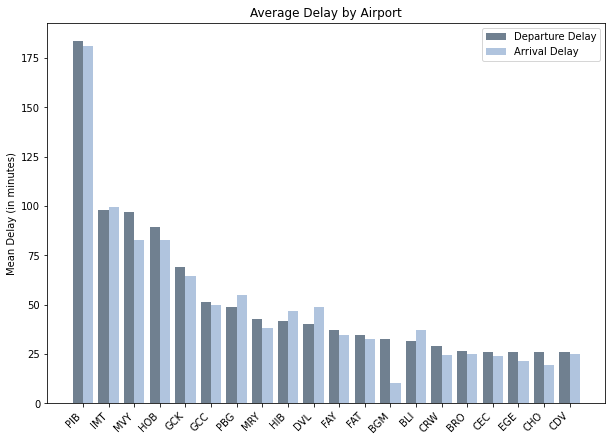

In [40]:
fig = plt.figure(figsize = (10,7)) #dpi for higher resolution graph
airports = grouped_airports2['ORIGIN_AIRPORT'].tolist()
delay = list(grouped_airports2['DEPARTURE_DELAY'])
arrival = list(grouped_airports2['ARRIVAL_DELAY'])


X_axis = np.arange(len(airports[:20]))
plt.bar(X_axis - 0.2, delay[:20] ,   0.4,   label = 'Departure Delay',   color = 'slategrey')
plt.bar(X_axis + 0.2, arrival[:20] , 0.4, label = 'Arrival Delay',   color = 'lightsteelblue')
  
plt.xticks(X_axis, airports[:20])
plt.xticks(rotation=45, ha="right") #diagonal x ticks
plt.ylabel("Mean Delay (in minutes)")
plt.title("Average Delay by Airport")
plt.legend() #legend in top left side
plt.show()

In [41]:
airport_flight_location.loc[airport_flight_location['ORIGIN_AIRPORT'] == "PIB"]

,ORIGIN_AIRPORT,TOTAL_FLIGHTS,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
252,PIB,6,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,USA,31.46715,-89.33706


In [42]:
airport_flight_location.loc[airport_flight_location['ORIGIN_AIRPORT'] == "IMT"]

,ORIGIN_AIRPORT,TOTAL_FLIGHTS,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
284,IMT,4,Ford Airport,Iron Mountain/Kingsford,MI,USA,45.81835,-88.11454


In [43]:
airport_flight_location.loc[airport_flight_location['ORIGIN_AIRPORT'] == "MVY"]

,ORIGIN_AIRPORT,TOTAL_FLIGHTS,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
287,MVY,3,Martha's Vineyard Airport,Marthas Vineyard,MA,USA,41.39303,-70.61433


From the graph above we can observe that PIB or Hattiesburg-Laurel Regional Airport in Minnesota has the most delays, departure and arrival delays. On average, the departures and arrivals of flights are late by a little more than 175 minutes or almost 3 hours. When we look at the number of departure flights of that airport which is 6, we can conclude that since it is a small airport with not many flights, there might be underlining issues with organization, time management, shortage of employees and technologies because of budget constraints and also bad management.

## Section 5.4: <a class="anchor" id="5_4"></a> Busiest Airports Average Delay

In [44]:
airports_delayed_flights = pd.merge(airport_flight_location, grouped_airports2 ,on='ORIGIN_AIRPORT', how='left')
busiest_airports = airports_delayed_flights.head(10)
busiest_airports

,ORIGIN_AIRPORT,TOTAL_FLIGHTS,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEPARTURE_DELAY,ARRIVAL_DELAY
0,ATL,2974,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,9.094822,3.147613
1,ORD,2309,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,13.507146,7.877436
2,DFW,1923,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720,9.614665,5.033281
3,DEN,1645,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,12.894833,7.954407
4,LAX,1645,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,11.286322,6.765957
5,PHX,1274,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806,8.969388,4.681319
6,IAH,1233,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972,10.470397,6.322790
7,SFO,1228,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,11.790717,6.408795
8,LAS,1130,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,11.529204,6.638938
9,MSP,1030,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692,6.461165,1.766990


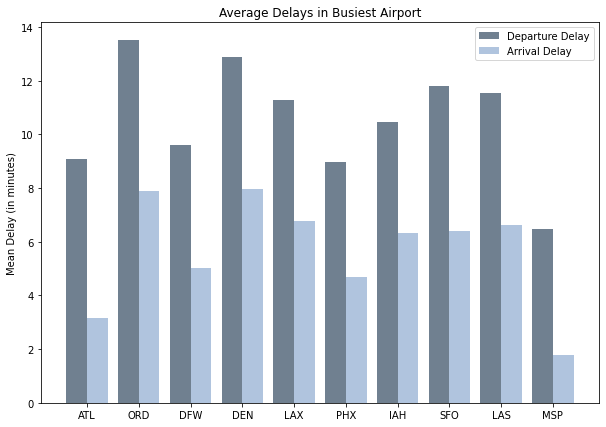

In [45]:
fig = plt.figure(figsize = (10,7)) #dpi for higher resolution graph
airports = busiest_airports['ORIGIN_AIRPORT'].tolist()
delay = list(busiest_airports['DEPARTURE_DELAY'])
arrival = list(busiest_airports['ARRIVAL_DELAY'])


#vals = pd.concat([busiest_airports.ORIGIN_AIRPORT, busiest_airports.TOTAL_FLIGHTS], axis=1)
#vals = vals.stack().reset_index(level=[0,1], drop=True)

X_axis = np.arange(len(airports[:20]))
plt.bar(X_axis - 0.2, delay[:20] ,   0.4,   label = 'Departure Delay',   color = 'slategrey')
plt.bar(X_axis + 0.2, arrival[:20] , 0.4, label = 'Arrival Delay',   color = 'lightsteelblue')
  
plt.xticks(X_axis, airports[:20])
plt.xticks(rotation=0) #ha="right") #diagonal x ticks
plt.ylabel("Mean Delay (in minutes)")
plt.title("Average Delays in Busiest Airport")
plt.legend() #legend in top left side
plt.show()

#for idx, p in enumerate(ax.patches):
 #   height = p.get_height()
  #  ax.text(p.get_x()+p.get_width()/2.,
   #         height + height*.01,
    #        vals[idx],
     #       ha="center")

From the graph above, which shows us the average delays of the 10 airports with the most flights in the US, we can see that flights delays during departure are much less than small airports, at around 11 minutes on average. On the other hand, arrival delays are even less, averaging around 5 minutes with MSP or "Minneapolis-Saint Paul International Airport" having less than 2 minutes of arrival delay on average.

## Section 5.5: <a class="anchor" id="5_5"></a>Airline Average Delay on Destination Airport

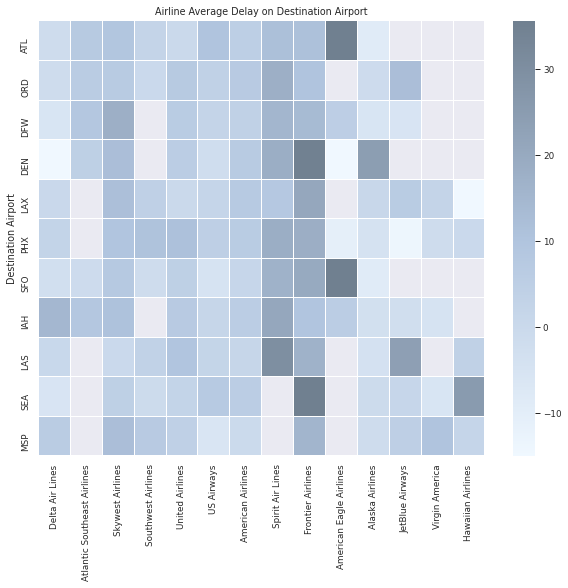

<Figure size 432x288 with 0 Axes>

In [46]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap #importing necessary packages
#grouping airports by destination airpot flights
destination_airports = flights_df['DESTINATION_AIRPORT'].groupby(flights_df["DESTINATION_AIRPORT"]).count().sort_values(ascending=False).iloc[:11].keys().tolist()
map = flights_df[['AIRLINE','DESTINATION_AIRPORT','ARRIVAL_DELAY']]

frames = list()
for airport in destination_airports:
        frames.append(map.loc[map["DESTINATION_AIRPORT"] == airport])
map = pd.concat(frames)

airline_destination_delay = pd.DataFrame()
for airlines in map["AIRLINE"].unique():
        temp = map.loc[map["AIRLINE"] == airlines]
        temparature = temp["ARRIVAL_DELAY"].groupby(temp["DESTINATION_AIRPORT"]).mean()
        airline_destination_delay[airlines] = temparature

sns.set(context = "paper")
plt.subplots(figsize = (10,8))
plt.title("Airline Average Delay on Destination Airport")
sns.heatmap(airline_destination_delay, linewidths = 0.01, cmap = LinearSegmentedColormap.from_list('rg',["aliceblue", "lightsteelblue", "slategrey"], N = 256),robust=True,yticklabels=destination_airports)
plt.ylabel("Destination Airport")
plt.show()
plt.savefig('Mean Delay for Airline Vs. Destination Airports.png')

## Section 5.6: <a class="anchor" id="5_6"></a>Total Month Flights

In [47]:
month_flights = flights_df[['MONTH']] #dataframe of 3 columns 
month_flights = month_flights.value_counts().reset_index().sort_values(by = "MONTH")
month_flights = month_flights.rename(columns = {0: 'TOTAL_FLIGHTS'})
month_flights

,MONTH,TOTAL_FLIGHTS
9,1,3889
10,2,3615
2,3,4241
6,4,4023
5,5,4091
4,6,4124
0,7,4471
1,8,4381
8,9,3936
7,11,3955


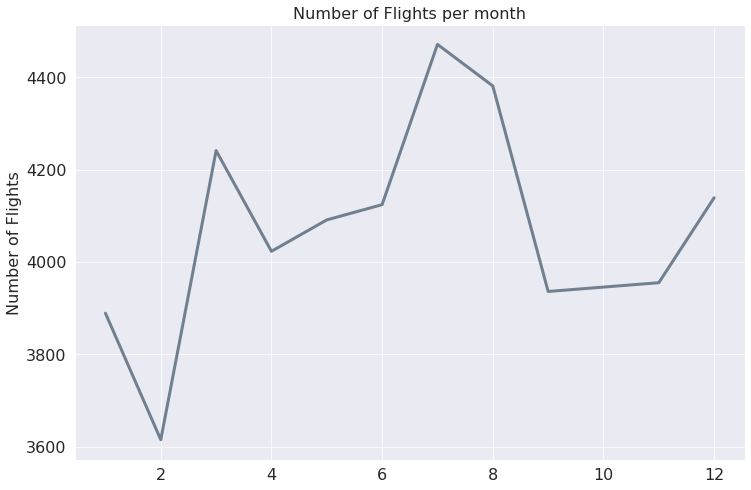

In [48]:
months = month_flights['MONTH'].tolist()
flights = month_flights['TOTAL_FLIGHTS']

plt.figure(figsize=(12,8))
plt.plot(months, flights, color = 'slategrey', linewidth = 3, label = "month flights")
#plt.plot(months_delays, flights_delays, color = 'lightsteelblue', linewidth = 3, label = "month delays")
plt.ylabel("Number of Flights", fontsize=16)
plt.title("Number of Flights per month", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

## Section 5.7: <a class="anchor" id="5_7"></a>Average Month Delay

In [49]:
month_delays = flights_df[['MONTH', 'ARRIVAL_DELAY']] #dataframe of 3 columns 
#getting the mean of departure and arrival delay grouped by airline and sorted by departure delay
month_delays = month_delays.groupby(['MONTH']).mean().reset_index().sort_values(by = "MONTH")
month_delays

,MONTH,ARRIVAL_DELAY
0,1,6.771149
1,2,7.356570
2,3,4.424664
3,4,3.048223
4,5,4.426302
5,6,9.744665
6,7,6.457616
7,8,5.223465
8,9,-1.008130
9,11,1.734260


In [50]:
month_delays['MONTH'] = month_delays['MONTH'].replace(1, 'Jan')
month_delays['MONTH'] = month_delays['MONTH'].replace(2, 'Feb')
month_delays['MONTH'] = month_delays['MONTH'].replace(3, 'Mar')
month_delays['MONTH'] = month_delays['MONTH'].replace(4, 'Apr')
month_delays['MONTH'] = month_delays['MONTH'].replace(5, 'May')
month_delays['MONTH'] = month_delays['MONTH'].replace(6, 'Jun')
month_delays['MONTH'] = month_delays['MONTH'].replace(7, 'Jul')
month_delays['MONTH'] = month_delays['MONTH'].replace(8, 'Aug')
month_delays['MONTH'] = month_delays['MONTH'].replace(9, 'Sep')
month_delays['MONTH'] = month_delays['MONTH'].replace(11, 'Nov')
month_delays['MONTH'] = month_delays['MONTH'].replace(12, 'Dec')

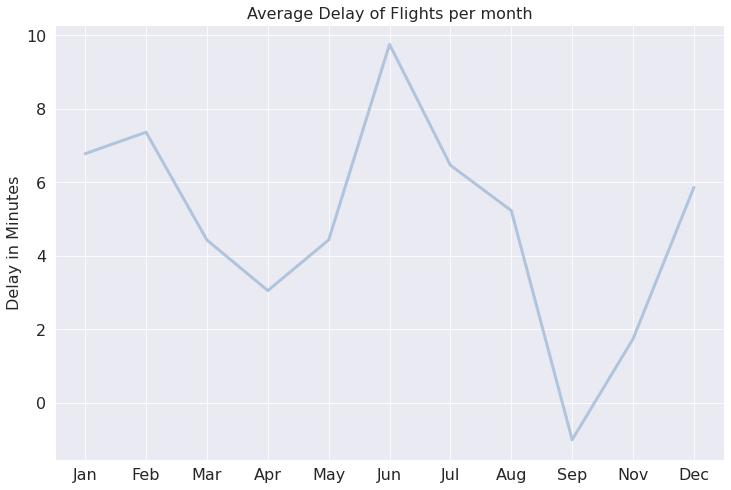

In [51]:
months_delays = month_delays['MONTH'].tolist()
flights_delays = month_delays['ARRIVAL_DELAY']

plt.figure(figsize=(12,8))
plt.plot(months_delays, flights_delays, color = 'lightsteelblue', linewidth = 3, label = "month delays")
plt.ylabel("Delay in Minutes", fontsize=16)
plt.title("Average Delay of Flights per month", fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

# Section 6: <a class="anchor" id="section6"></a> Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

## Section 6.1: <a class="anchor" id="6_1"></a> Handling Categorical Variables 

In [52]:
dummied_variables = ["AIRLINE", "DESTINATION_AIRPORT", "ORIGIN_AIRPORT"] #controlling for categorical variables

flights_df_dummied = pd.get_dummies(flights_df, columns = dummied_variables, drop_first = True)

In [53]:
flights_df_dummied.head()

,MONTH,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,...,ORIGIN_AIRPORT_TYR,ORIGIN_AIRPORT_TYS,ORIGIN_AIRPORT_UST,ORIGIN_AIRPORT_VLD,ORIGIN_AIRPORT_VPS,ORIGIN_AIRPORT_WRG,ORIGIN_AIRPORT_WYS,ORIGIN_AIRPORT_XNA,ORIGIN_AIRPORT_YAK,ORIGIN_AIRPORT_YUM
0,1,533,540.0,7,720,723.0,3,167,163,142,...,0,0,0,0,0,0,0,0,0,0
1,1,550,550.0,0,649,649.0,0,59,59,28,...,0,0,0,0,0,0,0,0,0,0
2,1,600,550.0,-10,829,822.0,-7,209,212,196,...,0,0,0,0,0,0,0,0,0,0
3,1,600,555.0,-5,753,749.0,-4,173,174,153,...,0,0,0,0,0,0,0,0,0,0
4,1,600,555.0,-5,735,738.0,3,95,103,64,...,0,0,0,0,0,0,0,0,0,0


## Section 6.2: <a class="anchor" id="6_2"></a> Splitting the Dataset 

In [54]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [55]:
flights_df_new = flights_df_dummied.reset_index()
flights_df_dummied_train, flights_df_dummied_test = split_train_test_by_id(flights_df_new, 0.2, "index")

In [56]:
#drop from the training set the output values (arrival delay) and create a set with just those values
X_train = flights_df_dummied_train.drop("ARRIVAL_DELAY", axis=1)
y_train = flights_df_dummied_train["ARRIVAL_DELAY"].copy() 

In [57]:
#drop from the training set the output values (arrival delay) and create a set with just those values
X_test = flights_df_dummied_test.drop("ARRIVAL_DELAY", axis=1)
y_test = flights_df_dummied_test["ARRIVAL_DELAY"].copy() 

In [58]:
print('The train set contains', X_train.shape[0], 'observations' + ', ' + 'and the test set contains', X_test.shape[0], 'values.')

The train set contains 35892 observations, and the test set contains 8973 values.


# Section 7: <a class="anchor" id="section7"></a> Machine Learning Models

Since this is a prediction task we will be using regression models to try to predict the arrival delay of flights.

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Here we define a function that will give us the scores we need for the measurement of our models later.

## Section 7.1: <a class="anchor" id="7_1"></a> Random Forest Regressor

The first model that will be trained in this analysis is a RandomForest. A RandomForest is used because the nature of the Random Forest that is nonlinear nature gives it a boost over linear algorithms, and since this is a regression task, it makes the RandomForest an excellent option to train the data for higher accuracy. 

In [60]:
start = time.time()

forest_reg = RandomForestRegressor(random_state = 10)
forest_reg.fit(X_train, y_train)

forest_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

scores = cross_val_score(forest_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

stop = time.time()
forest_running_time = stop - start
print("Training_time: {} seconds".format(forest_running_time))

2.761614218542108
Scores: [13.42786237  6.22764744  6.64403218  6.30544447  6.79125041]
Mean: 7.879247374784031
Standard deviation: 2.7821308475656803
Training_time: 754.6248371601105 seconds


In [61]:
forest_reg = RandomForestRegressor(random_state = 10)
forest_reg.fit(X_train, y_train)

forest_predictions_test = forest_reg.predict(X_test)
forest_mse_test = mean_squared_error(y_test, forest_predictions_test)
forest_rmse_test = np.sqrt(forest_mse_test)
print(forest_rmse_test)

6.216283642559438


Considering the RandomForest results, we can see that the first MSE is telling us that the model is accurate by more or less ~2.7 minutes. On the other hand, cross-validation gives a different way of assessing the model performance which comes to ~7.9. By using cross-validation we get the generalizability of the model as the evaluation is not done on the data that is not used for training.

## Section 7.2: <a class="anchor" id="7_2"></a> Decision Tree Regressor

Next, a DecisionTree will be used for the training of the model. The DecisionTree is used because it can lay out the problem in order for  all the possible outcomes to be challenged. It gives us the opportunity to fully analyze the potential consequences of a decision. Finally, it provides us with a framework to evaluate the values of outcomes and the possibilities that they might be achieved. 

In [62]:
start = time.time()

tree_reg = DecisionTreeRegressor(random_state=10)
tree_reg.fit(X_train, y_train)

tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

scores = cross_val_score(tree_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
print(display_scores(tree_rmse_scores))

stop = time.time()
tree_running_time = stop - start
print("Training_time: {} seconds".format(tree_running_time))

0.0
Scores: [16.67551235  9.01271331  9.31360528  9.27515068  9.88070386]
Mean: 10.831537095324464
Standard deviation: 2.9356670870752146
None
Training_time: 20.508955001831055 seconds


Here we can see that the DecisionTree perfectly fits the train set as its accuracy its at 0.0 minutes out. This would be ideal, but the reality is that this model is simply overfitting the training set. It is later observed that when using cross-validation the score goes to ~10.8 minutes which is more logical.

## Section 7.3: <a class="anchor" id="7_3"></a> Gradient Boosting

In [63]:
start = time.time()

gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X_train, y_train)

gbr_pred = gbr_reg.predict(X_train)
gbr_mse = mean_squared_error(y_train, gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
print(gbr_rmse)

scores = cross_val_score(gbr_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

stop = time.time()
gbr_running_time = stop - start
print("Training_time: {} seconds".format(gbr_running_time))

7.627839996831087
Scores: [11.88970696  8.0410003   7.86913741  7.46911983  8.25780273]
Mean: 8.705353449538746
Standard deviation: 1.613028508531288
Training_time: 185.89226984977722 seconds


Here we can observe that GradientBoosting performs worse than the RandomForest model but better than the DecisionTree.

## Section 7.4: <a class="anchor" id="7_4"></a> Linear Regression

In [64]:
start = time.time()

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

linear_pred = linear_reg.predict(X_train)
linear_mse = mean_squared_error(y_train, linear_pred)
linear_rmse = np.sqrt(linear_mse)
print(linear_rmse)

scores = cross_val_score(linear_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

stop = time.time()
linear_running_time = stop - start
print("Training_time: {} seconds".format(linear_running_time))

1.5733830136257745e-12
Scores: [2.91754914e-12 1.25384022e-12 1.05594197e-12 9.92237213e-13
 1.76687616e-12]
Mean: 1.597288941584382e-12
Standard deviation: 7.139955160258693e-13
Training_time: 24.172053337097168 seconds


LinearRegression gives us the best result, with the model being able to predict flights and missing only about ~1 minute. 

## Section 7.5: <a class="anchor" id="7_5"></a> Visualization of Models' Training Times

In [65]:
models_running_time = [['RandomForest', forest_running_time], 
                       ['DecisionTree', tree_running_time],
                       ['GradientBoosting', gbr_running_time],
                       ['LinearRegression', linear_running_time]]


models_running_time_df = pd.DataFrame(models_running_time, columns = ['model', 'training_time_secs']).sort_values('training_time_secs', ascending = False)
models_running_time_df

,model,training_time_secs
0,RandomForest,754.624837
2,GradientBoosting,185.892270
3,LinearRegression,24.172053
1,DecisionTree,20.508955


Text(0.5, 1.0, 'Models Training Time')

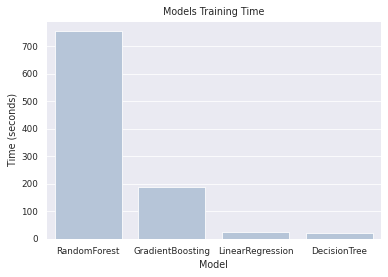

In [66]:
ax = sns.barplot(x = "model", y = "training_time_secs", data = models_running_time_df,
                order = models_running_time_df.model, color = "lightsteelblue")

ax.set_xlabel("Model")
ax.set_ylabel("Time (seconds)")
ax.set_title("Models Training Time")


Based on the bar chart above, it can be observed that RandomForesst takes the longest time train the data as expected since the RandomForest uses a technique that combines predictions from different Machine Learning algorithms in order to create a more accurate prediction than a single model.

# Section 8: <a class="anchor" id="section8"></a> Fine-tuning Models and Combining Them into a Better Solution

In this section of the analysis report, 2 models from the above section will be used to fine-tune and try to increase the accuracy (Square Root of Mean Squared Error in our case). The models selected will be RandomForest and LinearRegression since these are the best-performing models which will allow us to make even better models based on those initial results. 

## Section 8.1: <a class="anchor" id="8_1"></a> Fine-tuning of Random Forest

In [67]:
RandomForestRegressor(random_state = 42).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
parameters_grid = [
   {'n_estimators': [100], 
    'max_features': [8],
    'bootstrap': [False],
    'min_samples_leaf': [1],
    'min_samples_split': [10]
   }]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, parameters_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [False], 'max_features': [8],
                          'min_samples_leaf': [1], 'min_samples_split': [10],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
grid_search.best_params_

{'bootstrap': False,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, min_samples_split=10,
                      random_state=42)

In [71]:
forest_reg_grid = RandomForestRegressor(**grid_search.best_params_)
forest_reg_grid.fit(X_train, y_train)

#Predict on test set
forest_reg_grid_pred = forest_reg_grid.predict(X_test)

In [72]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

24.51955949198378 {'bootstrap': False, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [73]:
final_mse = mean_squared_error(y_test, forest_reg_grid_pred)
final_rmse = np.sqrt(final_mse)

In [74]:
final_rmse

22.75790838618177

Obviously, we can observe that the model performs a little worse on the test set after fine-tuning with cross validation. This might be due to the fact the model is overfitting on the training set. Over the analysis of this dataset, different combinations for hyper-parameters were tried to get the best result possible. Unfortunately, that was not possible and we only get the best results with the original models. In order to avoid overfitting in the RandomForest model, the most important task someone will need to perform is to enhance the tuning parameter that dominates the number of features that are chosen randomly to grow each tree from the bootstrapped data. This would be my next step but because of time constraints, that is not possible to be carried out. 

## Section 8.2: <a class="anchor" id="8_2"></a> Fine-tuning of Linear Regression

In [75]:
linear_reg = LinearRegression()

In [76]:
linear_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [77]:
linear_params = [
    {'copy_X': [True],
     'fit_intercept': [True],
     'normalize': [False],
     'positive': [False],
    }]

In [78]:
grid_search_reg = GridSearchCV(linear_reg, linear_params, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'copy_X': [True], 'fit_intercept': [True],
                          'normalize': [False], 'positive': [False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
grid_search_reg.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [80]:
linear_reg_grid = linear_reg.set_params(**grid_search_reg.best_params_)
linear_reg_grid.fit(X_train, y_train)
linear_reg_grid_pred = linear_reg_grid.predict(X_test)

In [81]:
cvres_reg = grid_search_reg.cv_results_
for mean_score, params in zip(cvres_reg["mean_test_score"], cvres_reg["params"]):
    print(np.sqrt(-mean_score), params)

1.749606115619399e-12 {'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}


In [82]:
final_mse_reg = mean_squared_error(y_test, linear_reg_grid_pred)
final_rmse_reg = np.sqrt(final_mse_reg)
final_rmse_reg

1.5945968415505791e-12

In the regression model we can ovbserve that the original model is a model that fits the training set good but when we use the fine-tuned model it gives us an even better result than the first regression model. 

In the end, we can conclude that the LinearRegression is the model that fits our data the best thus the results we get.

# Section 9: <a class="anchor" id="section9"></a> Final Solution, Limitations and Summary Conclusions

Moving on to the final section of this report, and the final solution of the model as well as limitations and summary conclusions.

## Section 9.1: <a class="anchor" id="9_1"></a> Final Solution

In [87]:
from sklearn.ensemble import VotingRegressor
VotingRegressor_combination = VotingRegressor(
    estimators = [('rf', forest_reg), ('dt', tree_reg), ('lr', linear_reg)],
    n_jobs = -1)

for regressor, label in zip([VotingRegressor_combination], ['Ensemble']):
    scores = cross_val_score(regressor, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
    print("Minutes: %0.2f [%s]" % (scores.mean(), label))

Minutes: -36.78 [Ensemble]


The VotingRegressor model predicts the flights delays but is out ~37 minutes which is not great, considering that the LinearRegression model performs the best in this situation. 

## Section 9.2: <a class="anchor" id="9_2"></a> Limitations

Evidently, the hyper-parameter tuning did not improve the 2 models selectes, RandomForest and LinearRegression. As discussed above, different solutions were tried and further data cleaning had to be completed to try and minimize overfitting and give us a better model. Unfortunately, a limitation of this project is time-constraints. If there was more time to fine-tune more solutions with better combinations, the models after hyper-parameter tuning would be able to perform even better. 

Also, the dataset only showed us flights for the year 2015. If we have more data from other years, it would give us the ability to control for seasonality and events such as pandemics which also disrupt travelling. Moreover, in order to avoid over-fitting in the RandomForest model, *k*-fold cross-validation would be used, and the tuning parameter that lessens test sample innacuracy would be chosen. In addition, if there was more time, a larger forest would be used which would boost the accuracy of the model. 

## Section 9.3: <a class="anchor" id="9_3"></a> Summary Conclusions

To summarise everything that has been analyzed so far, the least busy airports are the ones that have the most delays and that might be due to the fact that there is not much organization and the people in charge find it hard to run it logistically. All in all, all the models are accurate from 1 to ~10 minutes. The models overall perfom fairly okay. Unfortunately, there was not enough time due to computational constraints to run more models and find the best hyper-parameters for the RandomForest. The LinearRegression is the best performing model, predicting flights accurately with ~1.5 minutes error. 

# Section 10: <a class="anchor" id="section10"></a> References

Aurélien Géron (2019) *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition.* Beijing: O'Reilly.

Maven Analytics (2022) *Airline Flight Delays* [ONLINE]. Available at: https://www.mavenanalytics.io/data-playground?page=5 [Accessed: 27 January, 2022].
